Интернет-магазин «В один клик» продаёт разные товары и вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Ход исследования:

- Обзор данных.
- Подготовка данных.
- Исследовательский анализ данных.
- Портрет пользователя каждого региона.
- Проверка гипотез.
- Написание общего вывода.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest, f_classif

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, precision_recall_curve

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import shap
#import math

In [2]:
import sklearn
sklearn.__version__

'1.5.1'

In [4]:
import sklearn
sklearn.__version__

'0.24.1'

In [4]:
import matplotlib
matplotlib.__version__

'3.7.4'

## Шаг 1. Откройте файл с данными и изучите общую информацию

Загрузим датафрейм в переменную 'market'.

In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')

In [6]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [7]:
market_money = pd.read_csv('/datasets/market_money.csv')

In [8]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [9]:
market_time = pd.read_csv('/datasets/market_time.csv')

In [10]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [11]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [12]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


**Промежуточный вывод**

Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы. 

Видно что в дате содержаться некоторые грамматические ошибки в данных, а также форматы названия колонок не идентичны и их нужно привести к одинаковому формату.

## Шаг 2. Подготовка данных

Выведем на экран количество пропусков по столбцам, дупликаты. Приведем названия всех колонок к нижнему регистру. 

In [13]:
market_file.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [14]:
market_file.duplicated().sum()

0

In [15]:
market_file.columns = market_file.columns.str.lower()

In [16]:
print(market_file['тип сервиса'].unique())

['премиум' 'стандартт' 'стандарт']


In [17]:
# создаём словарь соответствий текущих значений к новым
service = {                
                'премиум' : 'премиум',
                'стандартт' : 'стандарт', 
                'стандарт' : 'стандарт',
                }

# применим новые значения с помощью map
market_file['тип сервиса'] = market_file['тип сервиса'].map(service)

# проведем сверку результатов
market_file['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [18]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [19]:
market_money.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [20]:
market_money.duplicated().sum()

0

In [21]:
market_money.columns = market_money.columns.str.lower()

In [22]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [23]:
print(market_money['период'].unique())

['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [24]:
market_time.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [25]:
market_time.duplicated().sum()

0

In [26]:
market_time.columns = market_time.columns.str.lower()

In [27]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [28]:
print(market_time['период'].unique())

['текущий_месяц' 'предыдцщий_месяц']


In [29]:
# создаём словарь соответствий текущих значений к новым
time = {                
                'текущий_месяц' : 'текущий_месяц',
                'предыдцщий_месяц' : 'предыдущий_месяц'
                }

# применим новые значения с помощью map
market_time['период'] = market_time['период'].map(time)

# проведем сверку результатов
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [30]:
market_time.head(10)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдущий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдущий_месяц,8


In [31]:
money.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [32]:
money.duplicated().sum()

0

In [33]:
money.columns = money.columns.str.lower()

In [34]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Промежуточный вывод**

- Все столбцы в таблицах имеют типы данных, соответствующие их описанию.
- Дублей нет;
- Названия фич уже приведены в порядок на этапе загрузки данных;
- В нкеоторых столбцах название категорий cкорректированы:
- Пропусков нет.

## Шаг 3. Проведем исследовательский анализ данных

Проведем статистический анализ всех признаков. Построим графики для каждого признака. Сделаем выводы о данных.

In [35]:
# Функция для построения гистограммы и диаграммы размаха для столбцов с количественными признаками
def hist_box(data, column):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    
    # Гистограмма 
    sns.histplot(data[column], kde=True, ax=ax[0], bins=int(len(data[column])**0.5))
    ax[0].set_title(f'Гистограмма "{column}"')
    ax[0].set_xlabel(f'Значения столбца "{column}"')
    ax[0].set_ylabel('Частота')
    
    # Диаграмма размаха
    sns.boxplot(x=data[column], ax=ax[1])
    ax[1].set_title(f'Диаграмма размаха для "{column}"')
    ax[1].set_xlabel(f'Значения столбца "{column}"')
    
def cat_func(data):
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        counts = data[column].value_counts()
        labels = counts.index
        plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Распределение для "{column}"')
        plt.show()

In [36]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [37]:
market_file_num = market_file.select_dtypes(include='number').drop(['id'], axis=1)

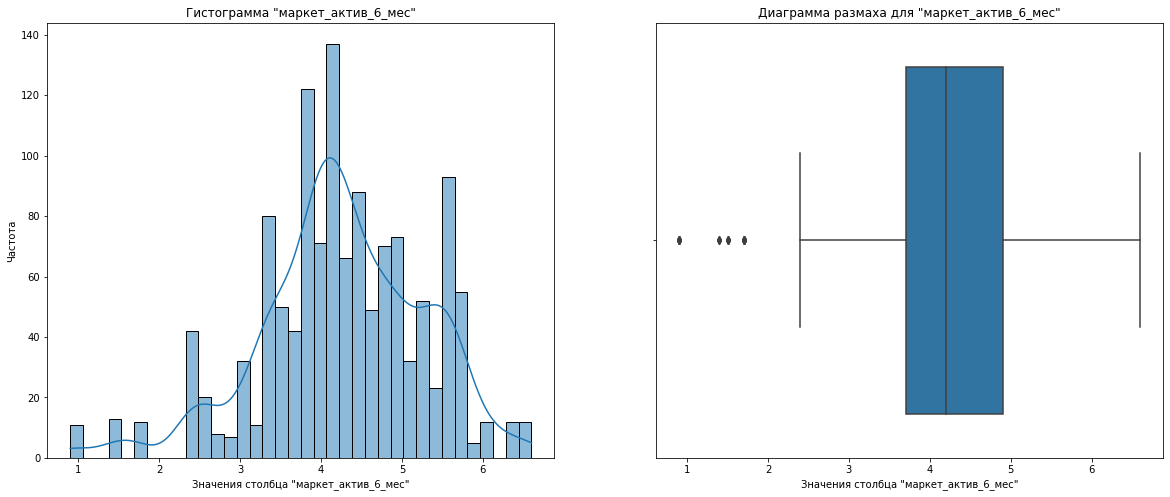

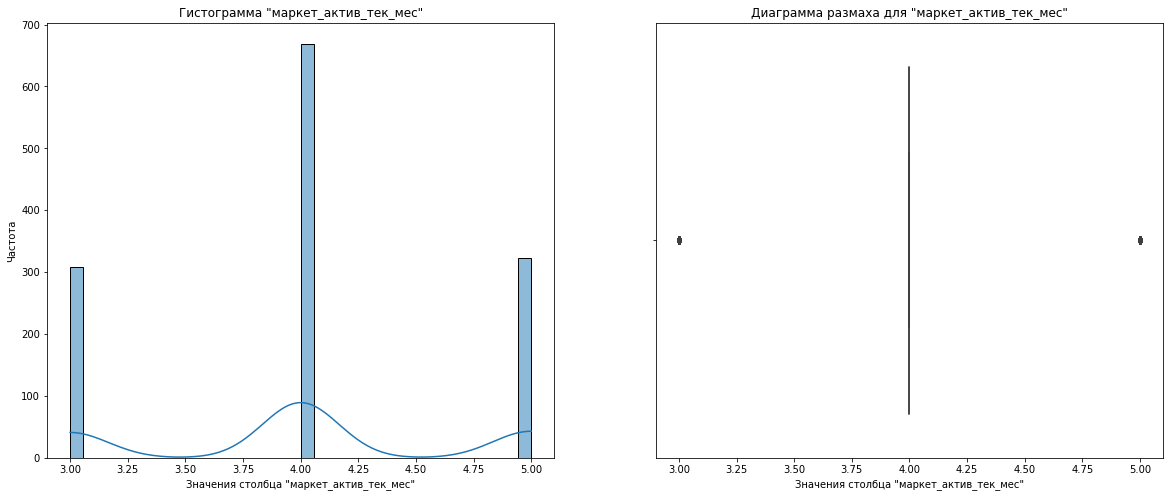

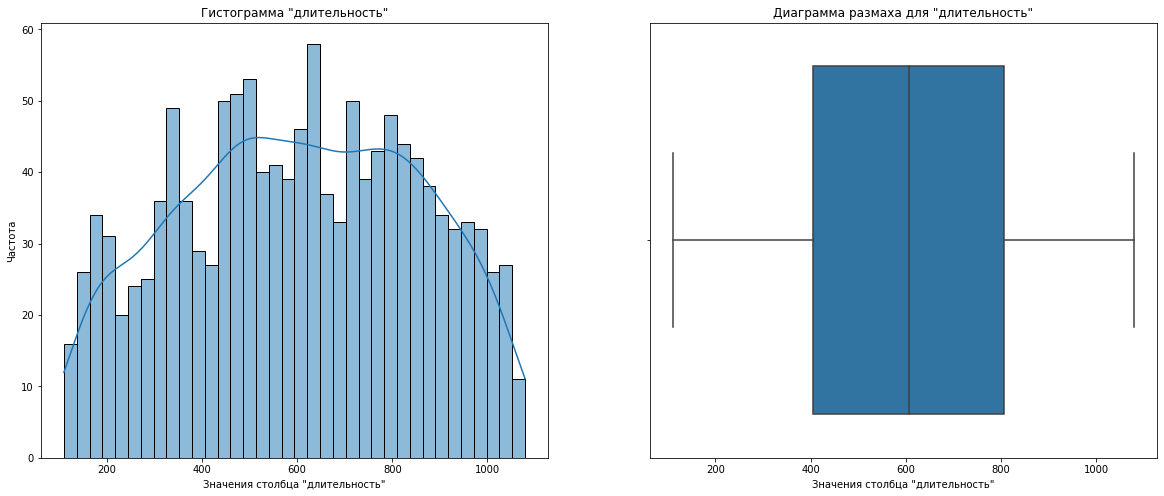

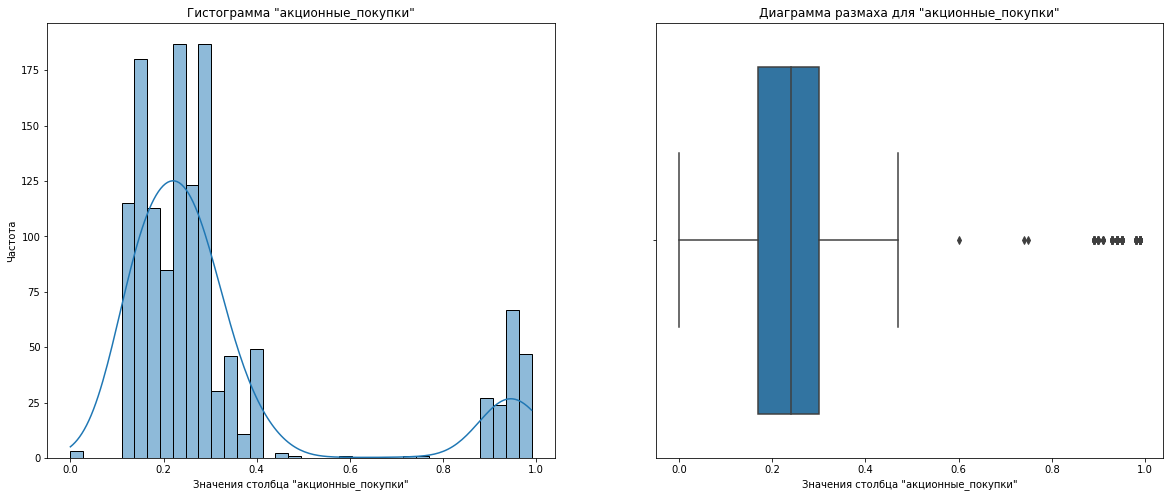

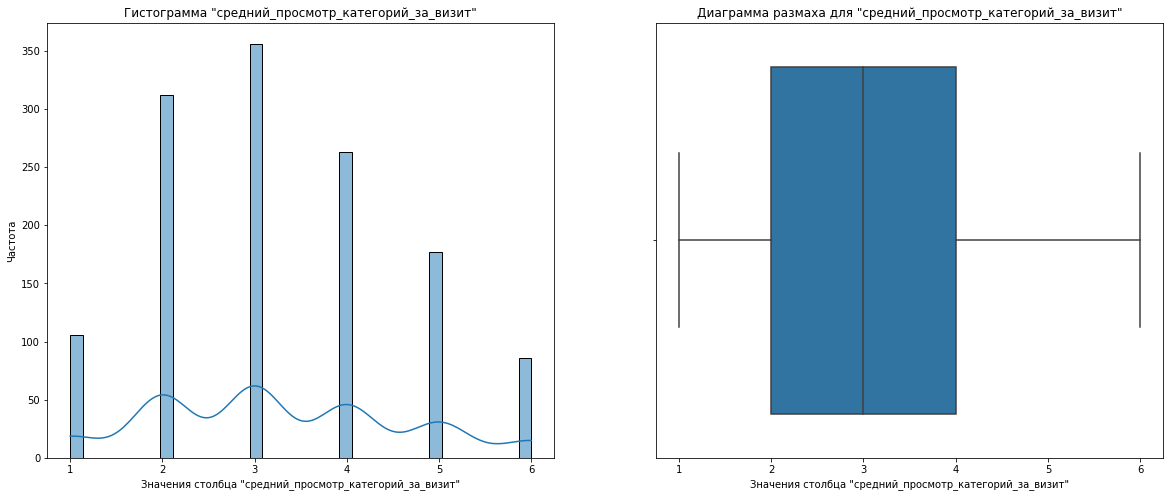

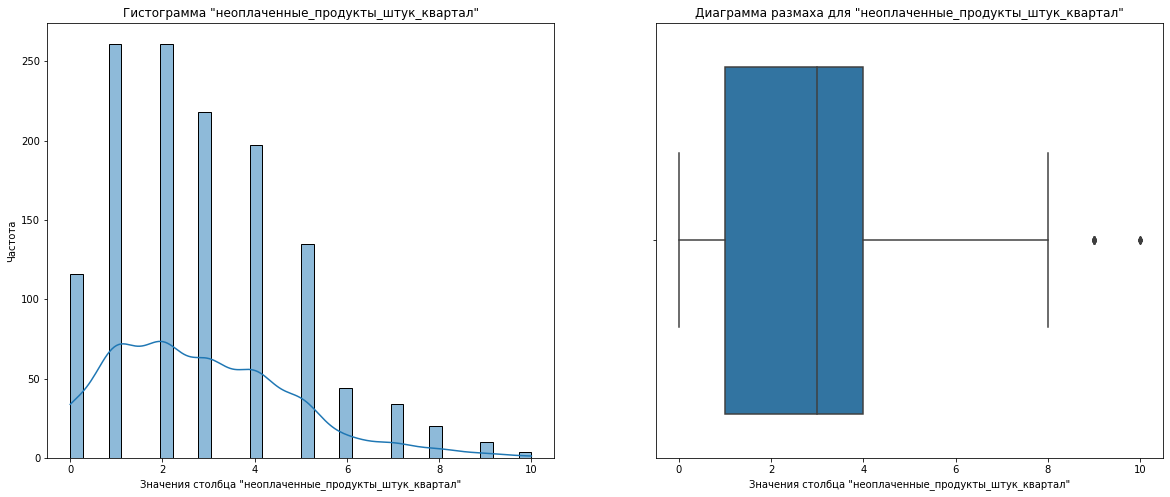

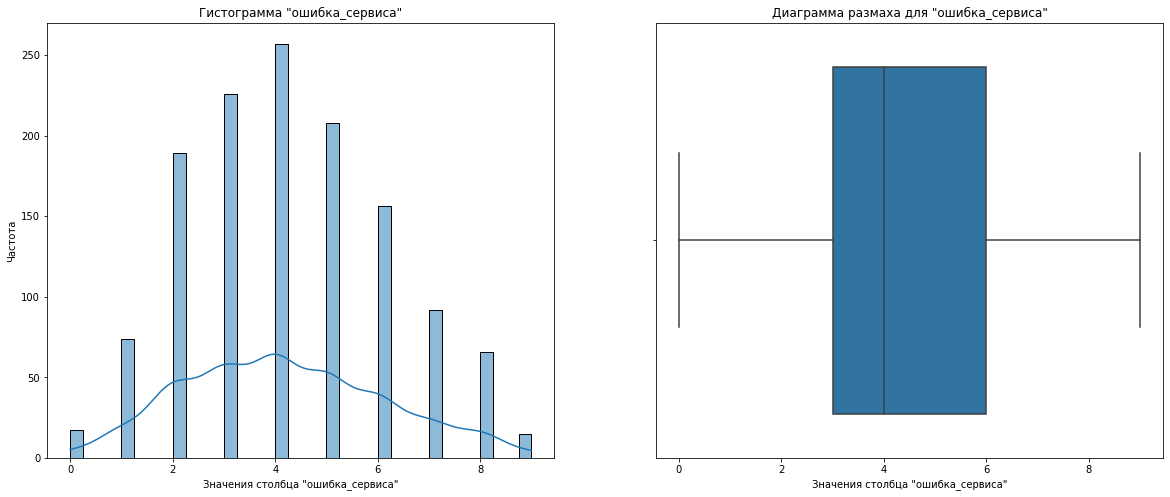

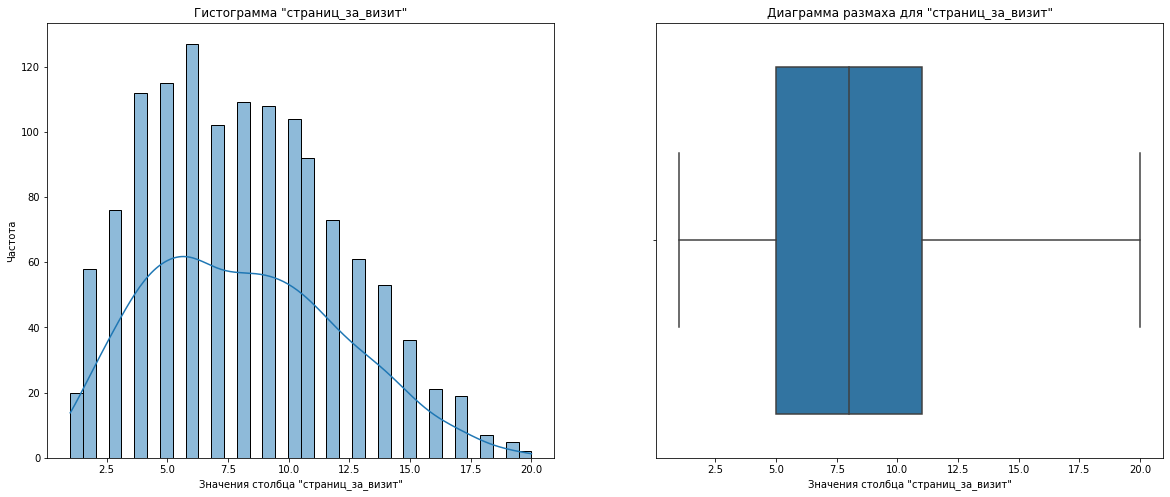

In [38]:
for name in market_file_num.columns:
    hist_box(market_file, name)

In [39]:
market_file_cat = market_file.select_dtypes(include='object')

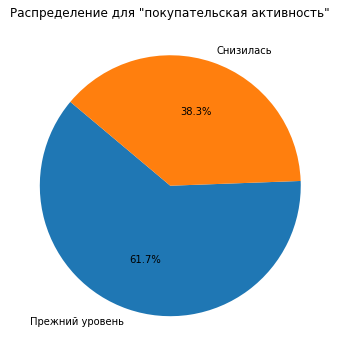

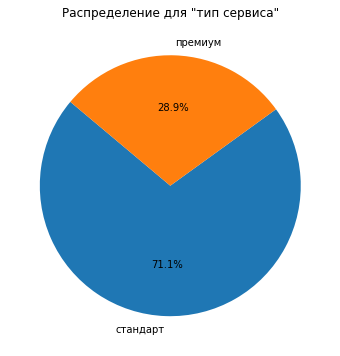

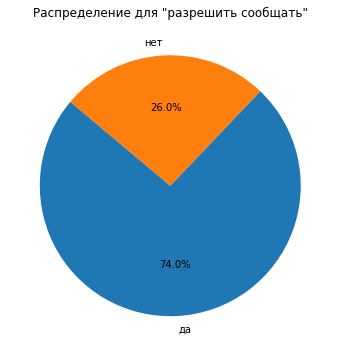

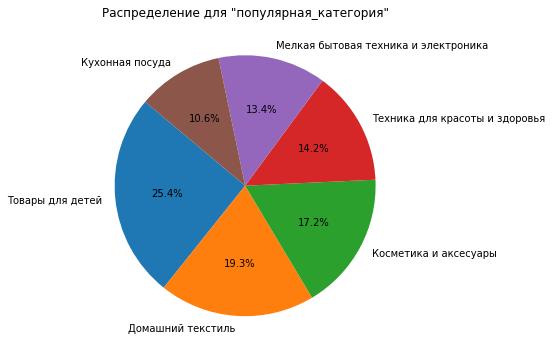

In [40]:
# Применение функции к категориальным данным
cat_func(market_file_cat)

Анализ market_time

In [41]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [42]:
# Создаём DataFrame, содержащий только числовые столбцы market_time (без id)
market_time_num = market_time.select_dtypes(include='number').drop(['id'], axis=1)

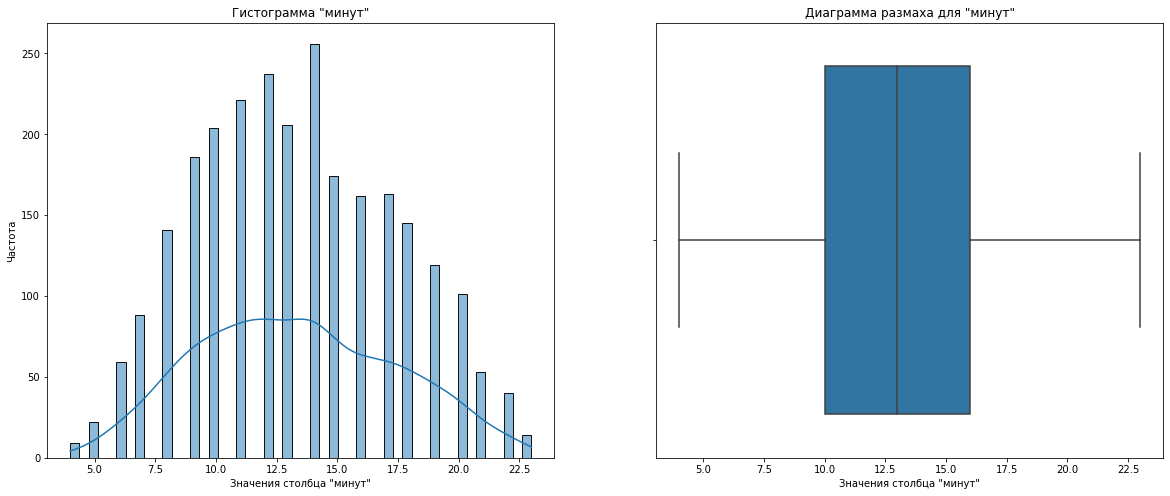

In [43]:
for name in market_time_num.columns:
    hist_box(market_time, name)

Анализ market_money

In [44]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [45]:
market_money_num = market_money.select_dtypes(include='number').drop(['id'], axis=1)

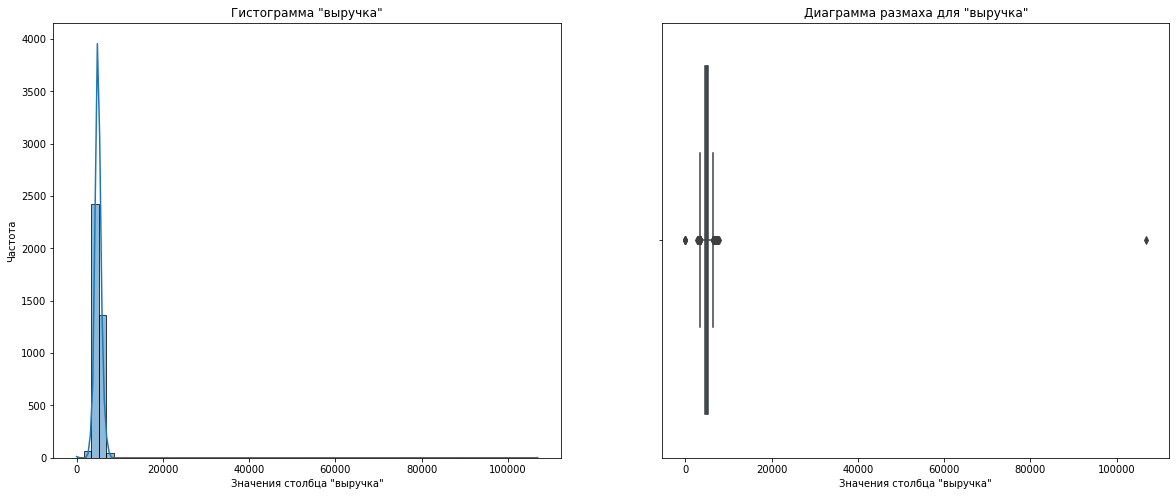

In [46]:
for name in market_money_num.columns:
    hist_box(market_money, name)

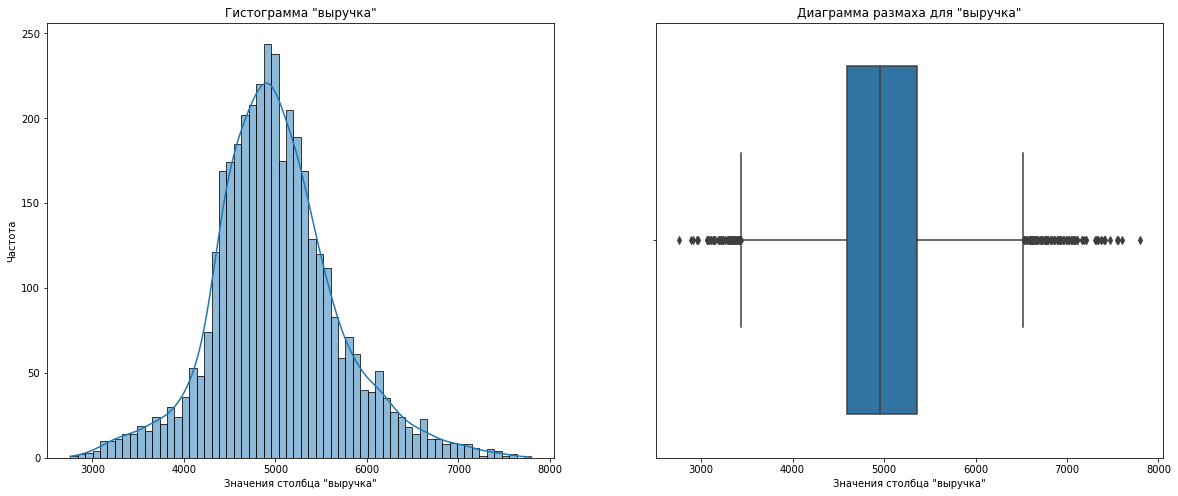

In [47]:
# Создаем переменную без аномальны значений выручки
market_money = market_money.query('0 < выручка < 106862.2')

# Построение распределений количественных признаков датасета без выбросов
for name in market_money_num.columns:
    hist_box(market_money, name)

In [48]:
market_money.describe()

,id,выручка
count,3893.000000,3893.000000
mean,215998.649371,5007.282918
std,374.681667,679.724898
min,215348.000000,2758.700000
25%,215674.000000,4592.000000
50%,215999.000000,4959.000000
75%,216323.000000,5363.000000
max,216647.000000,7799.400000


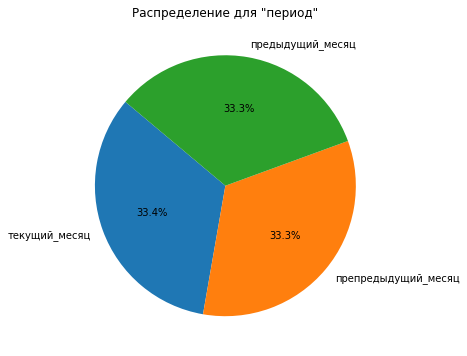

In [49]:
# Создание DataFrame с категориальными столбцами
market_money_cat = market_money.select_dtypes(include='object')

# Применение функции к категориальным данным
cat_func(market_money_cat)

Анализ money

In [50]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [51]:
# Создаём DataFrame, содержащий только числовые столбцы money (без id)
money_num = money.select_dtypes(include='number').drop(['id'], axis=1)

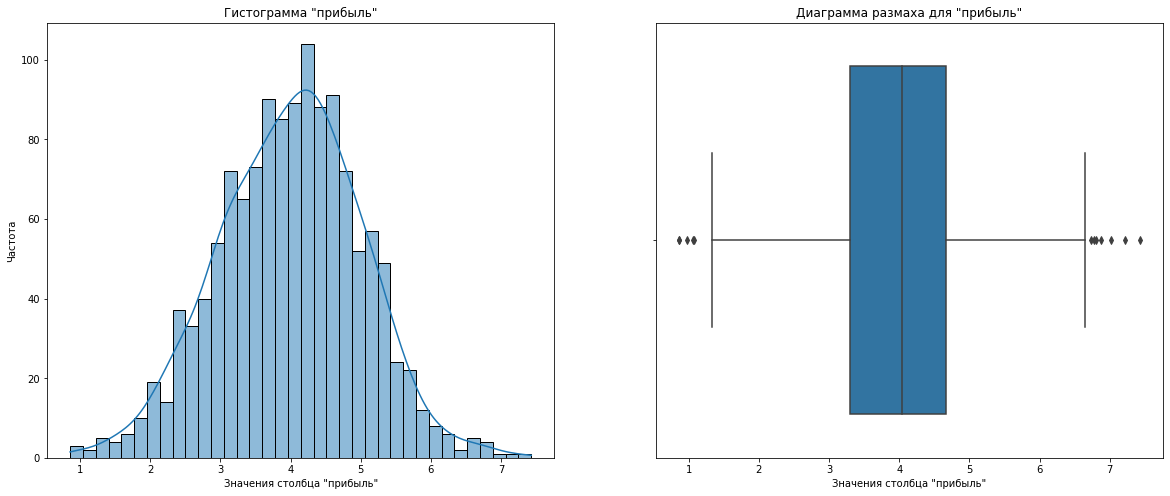

In [52]:
for name in money_num.columns:
    hist_box(money, name)

Отберем клиентов с покупательской активностью не менее трёх месяцев. 

In [53]:
# Определение активных клиентов
active_clients = market_money.groupby('id').filter(lambda x: x['период'].nunique() == 3)

# Получение списка активных клиентов
active_clients_ids = active_clients['id'].unique()

# Фильтрация данных по активным клиентам в каждом датасете
market_file = market_file[market_file['id'].isin(active_clients_ids)]
market_money = market_money[market_money['id'].isin(active_clients_ids)]
market_time = market_time[market_time['id'].isin(active_clients_ids)]
money = money[money['id'].isin(active_clients_ids)]

print('market_file' ,market_file.shape[0])
print('market_money', market_money.shape[0])
print('market_time', market_time.shape[0])
print('money', money.shape[0])

market_file 1296
market_money 3888
market_time 2592
money 1296


## Шаг 4. Объединение таблиц

In [54]:
print(f'market_file: {market_file.shape}')
print(f'market_money: {market_money.shape}')
print(f'market_time: {market_time.shape}')
print(f'money: {money.shape}')

market_file: (1296, 13)
market_money: (3888, 3)
market_time: (2592, 3)
money: (1296, 2)


In [55]:
# Создание сводных таблиц для выручки и времени
market_money_grouped = market_money.pivot_table(index='id', columns='период', values='выручка')
market_money_grouped.columns = ['выручка_' + col for col in market_money_grouped.columns]

market_time_grouped = market_time.pivot_table(index='id', columns='период', values='минут')
market_time_grouped.columns = ['минут_' + col for col in market_time_grouped.columns]

# Объединение таблиц и создание итоговой таблицы
market_fin = market_file.merge(market_money_grouped, on='id').merge(market_time_grouped, on='id')

# Проверка на количество строк
original_rows = len(market_file)
merged_rows = len(market_fin)
if merged_rows != original_rows:
    print(f"Внимание: количество строк после объединения таблиц изменилось. Исходное количество строк: {original_rows}, количество строк после объединения: {merged_rows}")

# Просмотр первых 5 строк получившегося датафрейма
market_fin.head(5)

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [56]:
market_copy = market_fin.copy()

In [57]:
market_copy.head(5)

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


**Промежуточный вывод**

Выполнено объединение трех таблиц: market_file, market_money и market_time. Для этого были использованы методы pivot_table и merge библиотеки pandas.

Сначала были созданы сводные таблицы для market_money и market_time, где каждый период был преобразован в отдельный столбец. Это позволило нам иметь отдельные столбцы для выручки и времени на сайте для каждого периода.

Затем эти сводные таблицы были объединены с основной таблицей market_file по столбцу 'id'. Результатом является итоговая таблица market_fin, которая содержит все необходимые данные в удобном для анализа формате.

## Шаг 5. Корреляционный анализ

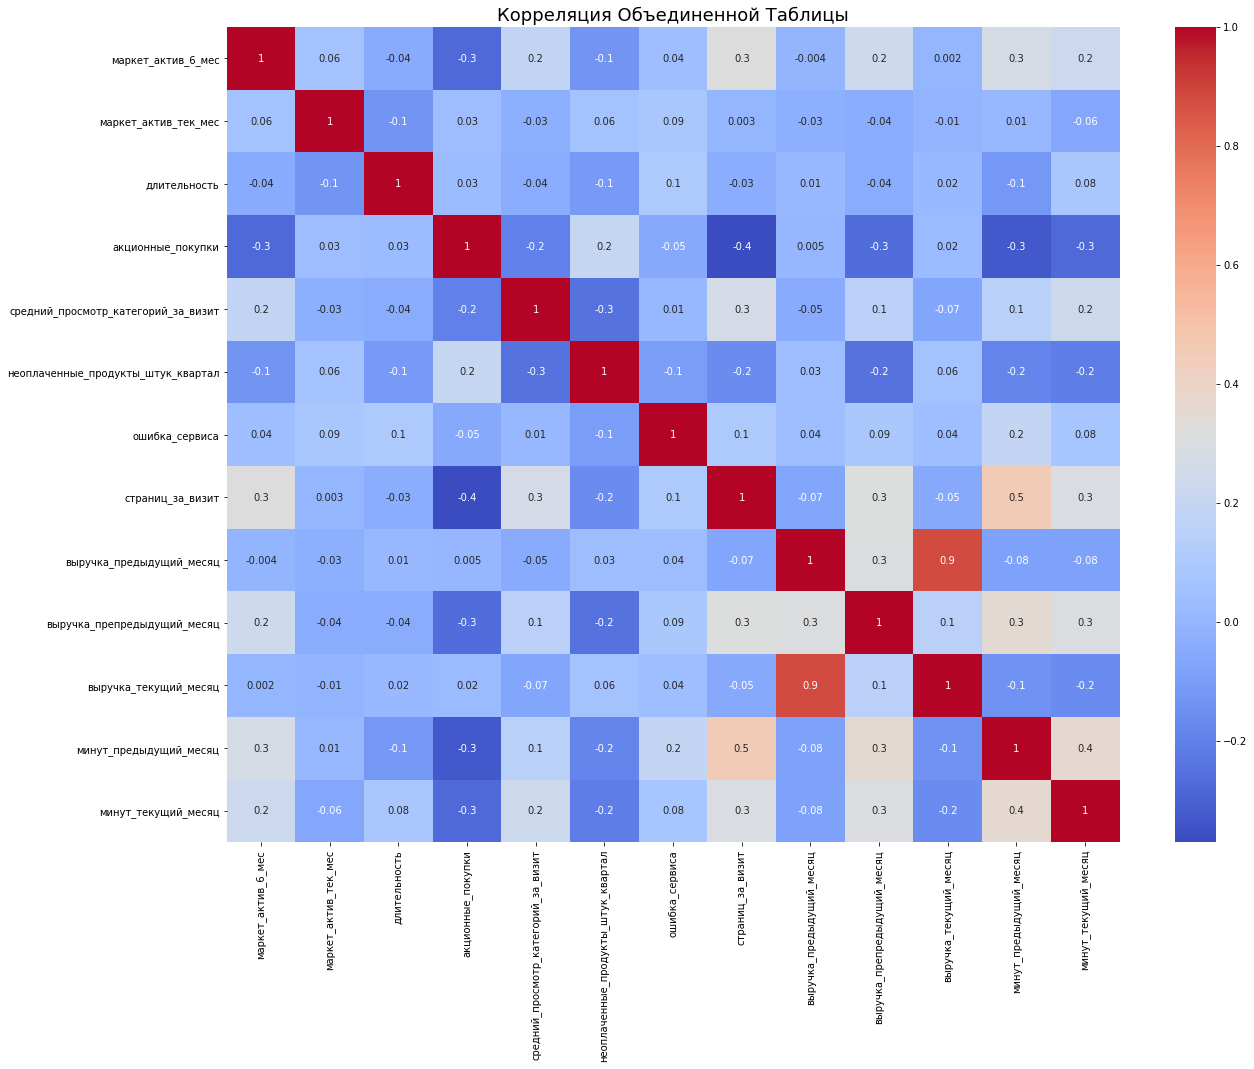

In [58]:
correlation_matrix = market_fin.drop('id', axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.corr(method='spearman'), annot = True, fmt='.1g', cmap= 'coolwarm')
plt.title(r'Корреляция Объединенной Таблицы', fontsize=18)
plt.show()

**Промежуточный вывод**

Корреляционный анализ позволяет оценить взаимосвязи между различными признаками в нашем наборе данных. 

Мультиколлинеарность, которая обозначает высокую корреляцию между двумя или более входными признаками, может привести к проблемам в моделировании, так как она затрудняет определение влияния отдельных признаков на целевую переменную. Однако, в нашем случае, мультиколлинеарность не является проблемой, так как коэффициенты корреляции между признаками не достигают критического уровня (обычно 0.9 или выше).

## Шаг 6. Использование пайплайнов

In [59]:
market_fin['акционные_покупки'].unique()

array([0.75, 0.14, 0.99, 0.94, 0.26, 0.23, 0.17, 0.13, 0.35, 0.74, 0.29,
       0.98, 0.95, 0.22, 0.4 , 0.24, 0.21, 0.39, 0.9 , 0.89, 0.27, 0.33,
       0.34, 0.32, 0.93, 0.3 , 0.28, 0.31, 0.25, 0.36, 0.16, 0.11, 0.2 ,
       0.18, 0.15, 0.6 , 0.12, 0.19, 0.44, 0.47, 0.91])

### Подготовка данных

In [60]:
market_fin['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Кухонная посуда', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [62]:
market_fin.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [63]:
market_fin['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [64]:
market_fin['разрешить сообщать'].unique() 

array(['да', 'нет'], dtype=object)

In [65]:
market_fin['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Кухонная посуда', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [87]:
market_fin.head(10)

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
8,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10
9,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5304.5,5555.0,5834.9,9,6


### Обучите четыре модели

In [99]:
# Разделение данных на обучающую и тестовую выборки
RANDOM_STATE = 42
X = market_fin.drop(['id', 'покупательская активность'], axis=1).reset_index(drop=True)
y = market_fin['покупательская активность']

le = LabelEncoder()
y_le = le.fit_transform(y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y_le, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
y_le, le.classes_

(array([1, 1, 1, ..., 0, 0, 0]),
 array(['Прежний уровень', 'Снизилась'], dtype=object))

In [100]:
# Определение категорий признаков
ohe_columns = ['разрешить сообщать', 'популярная_категория']
ord_columns = ['тип сервиса']
num_columns = [
    'маркет_актив_6_мес', 
    'маркет_актив_тек_мес', 
    'длительность', 
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц', 
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]


# Создание пайплайнов для обработки признаков
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')), 
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

ord_pipe = Pipeline([
    ('simple_imputer_ord_before', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['премиум', 'стандарт']], 
                           handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simple_imputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# Создание конечного пайплайна
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns), 
    ('ord', ord_pipe, ord_columns), 
    ('num', StandardScaler(), num_columns)
], remainder='passthrough')

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor), 
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {   'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)], 
        'models__max_depth': range(2, 11), 
        'models__max_features': range(2, 5), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()], 
        'models__n_neighbors': range(1, 20), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]},
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')], 
        'models__C': range(1, 5), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
    {
        'models': [SVC(random_state=RANDOM_STATE)], 
        'models__degree': range(2, 3), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
     #   'models__random_state': [RANDOM_STATE]
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv = 5,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE,
    n_jobs = -1
)

# обучаем модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

# Вывод результатов
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['разрешить сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imputer_ord_before',
                                       

### Выберите лучшую модель, используя заданную метрику

In [101]:
# Проверка модели на тестовой выборке
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.91
Метрика F1-score на тестовой выборке: 0.89


In [102]:
# Анализ ошибок модели
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Матрица ошибок на тестовой выборке:\n', conf_matrix)
print('Отчет о классификации на тестовой выборке:\n', classification_report(y_test, y_test_pred))

Матрица ошибок на тестовой выборке:
 [[152   9]
 [ 17  82]]
Отчет о классификации на тестовой выборке:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       161
           1       0.90      0.83      0.86        99

    accuracy                           0.90       260
   macro avg       0.90      0.89      0.89       260
weighted avg       0.90      0.90      0.90       260



Построение кривой precision-recall: Кривая позволяет оценить производительность модели при различных порогах вероятности классификации. 

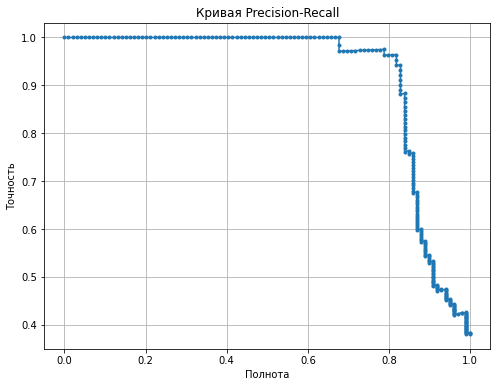

In [103]:
# Построение кривой precision-recall
precision, recall, _ = precision_recall_curve(y_test, y_test_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая Precision-Recall')
plt.grid(True)
plt.show()

В этом шаге мы использовали ColumnTransformer для обработки категориальных и количественных признаков раздельно. Мы кодировали категориальные признаки с помощью OneHotEncoder и OrdinalEncoder, а количественные признаки масштабировали с помощью StandardScaler и MinMaxScaler.

Выбор модели: Было проведено сравнение нескольких моделей машинного обучения, включая Decision Tree, K-Nearest Neighbors, Logistic Regression и Support Vector Classifier. Использовался процесс подбора оптимальных гиперпараметров для каждой модели с помощью GridSearchCV.

Лучшая модель: Наилучшей моделью, оцененной с помощью метрики ROC-AUC на тренировочной выборке, оказалась LogisticRegretion. Это означает, что она имеет наилучшую способность разделять классы на тренировочных данных, что является важным показателем для эффективной классификации клиентов по их покупательской активности.

Оценка производительности: Выбранная модель была оценена на тестовой выборке с использованием метрик ROC-AUC и F1-score. ROC-AUC показало значение 0.91, что свидетельствует о хорошем качестве модели в разделении классов.

Анализ ошибок модели: Была проведена аналитика ошибок модели, включая построение матрицы ошибок и отчета о классификации на тестовой выборке. Это позволяет лучше понять, в каких случаях модель ошибается и какие классы она предсказывает наиболее точно.

Precision-Recall кривая: Была построена кривая precision-recall, которая позволяет оценить производительность модели при различных порогах вероятности классификации. 

Таким образом, на основании проведенного анализа можно утверждать, что LogisticRegretion является наилучшей моделью для классификации клиентов по их покупательской активности в данном наборе данных.

## Шаг 7. Анализ важности признаков

### Оцените важность признаков для лучшей модели

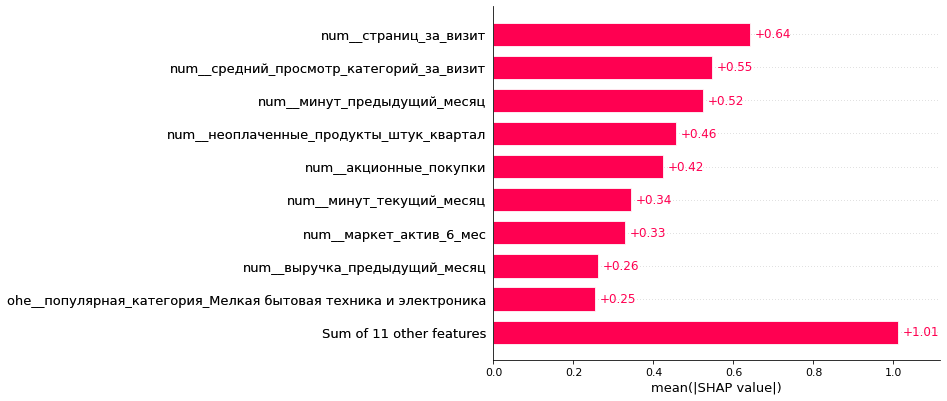

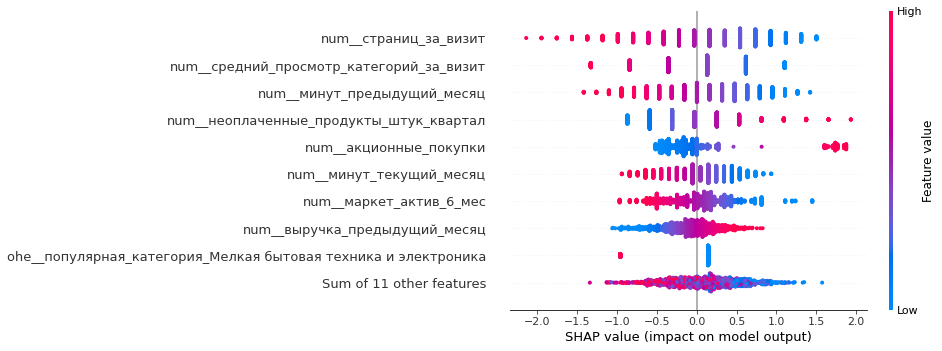

In [104]:
feature_names =randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Преобразование данных
X_train_transformed = pd.DataFrame(randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_train),
                                   columns=feature_names)

# Инициализация explainer
explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_transformed)

# Вычисление SHAP значений
shap_values = explainer(X_train_transformed)

# Построение графика важности признаков
shap.plots.bar(shap_values) 
shap.plots.beeswarm(shap_values)

### Сделайте выводы о значимости признаков:

Выводы о значимости признаков:

Малозначимые признаки: Некоторые признаки, такие как популярная_категория, выручка_текущий_месяц, ошибка_сервиса имеют очень низкую важность (SHAP значения близки к нулю). Это означает, что эти признаки мало влияют на прогнозы модели.

Наиболее важные признаки: Признаки, такие как 'num__страниц_за_визит', 'num__средний_просмотр_категорий_за_визит', 'num__предыдущий_месяц', 'ohe__популярная_категория_Мелкая бытовая техника и электроника' и 'num__неоплаченные_продукты_штук_квартал', имеют наибольшую важность. Это означает, что они сильно влияют на прогнозы модели.

Использование этих наблюдений при моделировании и принятии бизнес-решений:

Улучшение модели: Можно улучшить производительность модели, сосредоточившись на наиболее важных признаках. Например, можно провести более тщательный анализ этих признаков, оптимизировать их преобразование и масштабирование или создать новые признаки на основе них.

Принятие бизнес-решений: Важность признаков может помочь в принятии бизнес-решений, указывая на области, которые имеют наибольшее влияние на целевой признак. Например, если 'num__средний_просмотр_категорий_за_визит' является важным признаком, то увеличение числа просмотров категорий за визит может улучшить целевой показатель. Это может быть достигнуто путем улучшения пользовательского интерфейса, оптимизации навигации по сайту или проведения маркетинговых кампаний, направленных на увеличение вовлеченности пользователей.

## Шаг 8. Сегментация покупателей

Сегментация покупателей может быть выполнена на основе покупателей с высокой долей акционных покупок.

### Выполните сегментацию покупателей. 

In [105]:
market_copy.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [128]:
market_copy['акционные_покупки_категория'] = \
    market_copy['акционные_покупки'].apply(lambda x: 'Часто покупает по акции' if x>= 0.5 else 'Редко покупает по акции')

In [130]:
market_copy

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Часто покупает по акции
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Редко покупает по акции
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Часто покупает по акции
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Часто покупает по акции
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,Редко покупает по акции
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,Редко покупает по акции
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,Редко покупает по акции
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,Редко покупает по акции
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,Редко покупает по акции


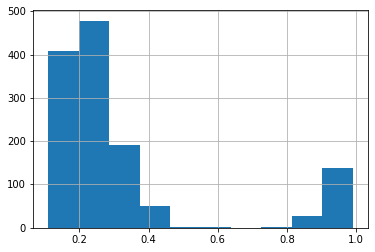

In [129]:
market_copy['акционные_покупки'].hist()
plt.show()

Распределение доли акционных покупок показывает два условных интервала - от (0.1, 0.5) и (0.6, 1).

Построю диаграмму рассеяния для каждого количественного признака в зависимости от доли акционных покупок, с учетом покупательской активности.

In [107]:
num = market_copy.select_dtypes(include='number').columns

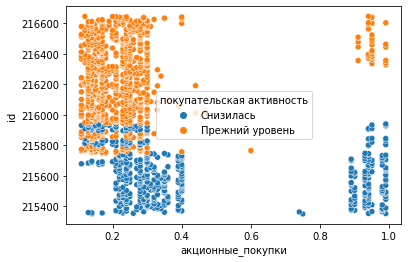

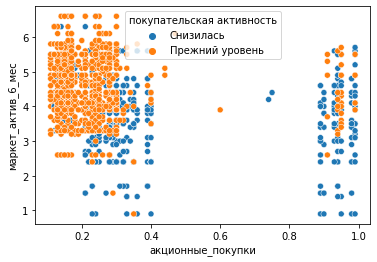

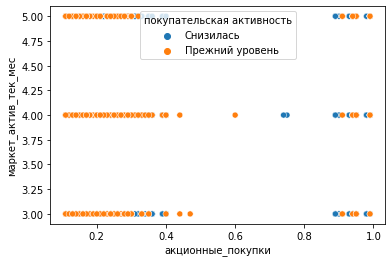

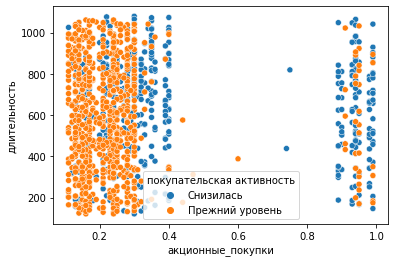

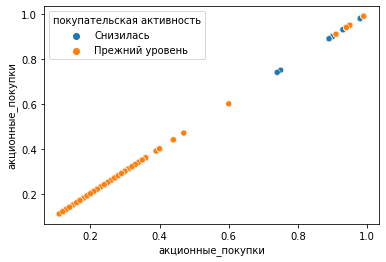

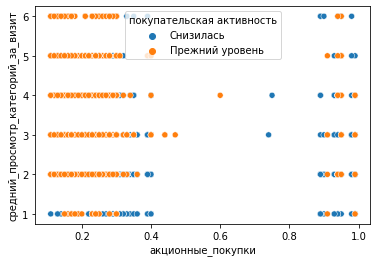

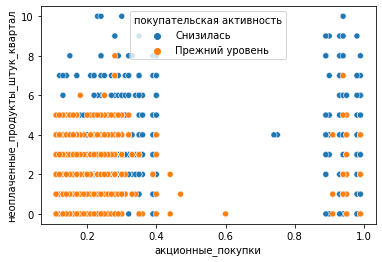

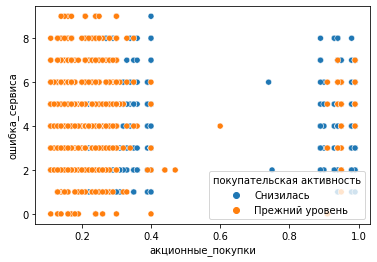

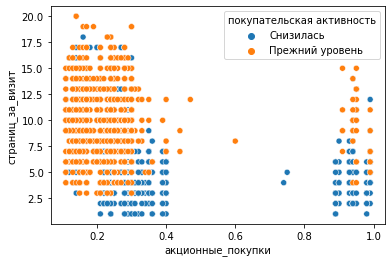

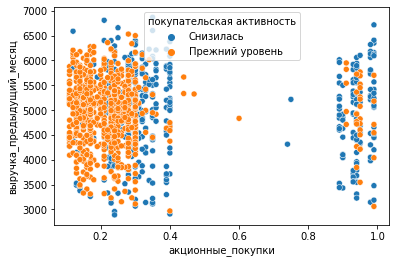

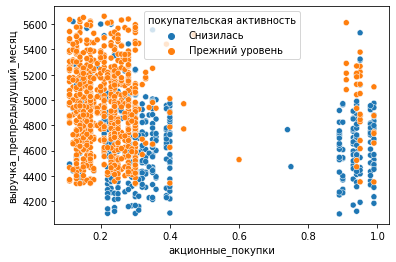

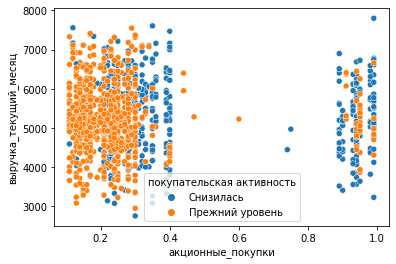

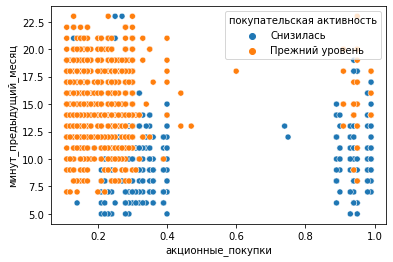

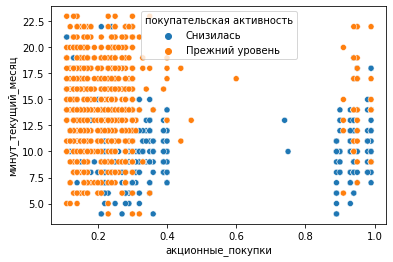

In [108]:
for i in num:
    sns.scatterplot(data=market_copy, x='акционные_покупки', y=i, hue='покупательская активность')
    plt.show()

Выделю сегмент покупателей с долей акционных покупок больше 0.6

In [131]:
segment = market_copy.query('акционные_покупки > 0.6')
segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   166 non-null    int64  
 1   покупательская активность            166 non-null    object 
 2   тип сервиса                          166 non-null    object 
 3   разрешить сообщать                   166 non-null    object 
 4   маркет_актив_6_мес                   166 non-null    float64
 5   маркет_актив_тек_мес                 166 non-null    int64  
 6   длительность                         166 non-null    int64  
 7   акционные_покупки                    166 non-null    float64
 8   популярная_категория                 166 non-null    object 
 9   средний_просмотр_категорий_за_визит  166 non-null    int64  
 10  неоплаченные_продукты_штук_квартал   166 non-null    int64  
 11  ошибка_сервиса                 

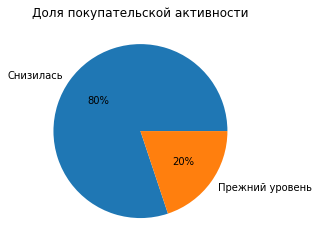

In [132]:
segment['покупательская активность'].value_counts().plot(kind='pie',autopct='%1.0f%%',legend=None,ylabel='')
plt.title('Доля покупательской активности');

In [133]:
#Для анализа возьму тестовые значения - X, y и вероятность предсказания класса
test_df = X_test
test_df['y_']=y_test
test_df

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,y_,y_pred_proba
50,премиум,да,3.0,5,954,0.93,Товары для детей,3,2,4,6,4918.0,4702.0,4940.1,5,5,1,1
683,премиум,нет,3.8,4,570,0.14,Товары для детей,2,1,2,13,3615.0,4763.0,4739.5,16,13,0,0
349,стандарт,да,0.9,4,212,0.95,Домашний текстиль,2,5,4,2,4685.5,4444.0,5161.3,9,7,1,1
508,стандарт,да,5.5,5,242,0.21,Кухонная посуда,5,4,4,11,4204.5,4614.0,3979.6,18,19,0,0
409,стандарт,нет,5.7,4,565,0.14,Домашний текстиль,5,1,4,12,4252.0,5023.0,3713.8,12,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,стандарт,да,4.0,4,618,0.93,Товары для детей,3,5,2,2,3783.0,4566.0,3848.0,9,10,1,1
238,стандарт,нет,2.4,4,427,0.29,Товары для детей,5,8,3,4,4321.0,4604.0,4640.8,12,14,1,1
1040,стандарт,да,4.6,5,356,0.17,Товары для детей,3,4,3,13,4973.0,4819.0,4969.1,20,9,0,0
596,стандарт,да,5.5,4,829,0.18,Товары для детей,3,0,5,5,3992.0,4962.0,4963.1,12,12,0,0


In [134]:
test_df['y_pred_proba'] = y_test_pred.tolist()
test_df

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,y_,y_pred_proba
50,премиум,да,3.0,5,954,0.93,Товары для детей,3,2,4,6,4918.0,4702.0,4940.1,5,5,1,1
683,премиум,нет,3.8,4,570,0.14,Товары для детей,2,1,2,13,3615.0,4763.0,4739.5,16,13,0,0
349,стандарт,да,0.9,4,212,0.95,Домашний текстиль,2,5,4,2,4685.5,4444.0,5161.3,9,7,1,1
508,стандарт,да,5.5,5,242,0.21,Кухонная посуда,5,4,4,11,4204.5,4614.0,3979.6,18,19,0,0
409,стандарт,нет,5.7,4,565,0.14,Домашний текстиль,5,1,4,12,4252.0,5023.0,3713.8,12,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,стандарт,да,4.0,4,618,0.93,Товары для детей,3,5,2,2,3783.0,4566.0,3848.0,9,10,1,1
238,стандарт,нет,2.4,4,427,0.29,Товары для детей,5,8,3,4,4321.0,4604.0,4640.8,12,14,1,1
1040,стандарт,да,4.6,5,356,0.17,Товары для детей,3,4,3,13,4973.0,4819.0,4969.1,20,9,0,0
596,стандарт,да,5.5,4,829,0.18,Товары для детей,3,0,5,5,3992.0,4962.0,4963.1,12,12,0,0


In [136]:
test_df['акционные_покупки_категория'] = \
    test_df['акционные_покупки'].apply(lambda x: 'Часто покупает по акции' if x>= 0.5 else 'Редко покупает по акции')


In [137]:
test_df

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,y_,y_pred_proba,акционные_покупки_категория
50,премиум,да,3.0,5,954,0.93,Товары для детей,3,2,4,6,4918.0,4702.0,4940.1,5,5,1,1,Часто покупает по акции
683,премиум,нет,3.8,4,570,0.14,Товары для детей,2,1,2,13,3615.0,4763.0,4739.5,16,13,0,0,Редко покупает по акции
349,стандарт,да,0.9,4,212,0.95,Домашний текстиль,2,5,4,2,4685.5,4444.0,5161.3,9,7,1,1,Часто покупает по акции
508,стандарт,да,5.5,5,242,0.21,Кухонная посуда,5,4,4,11,4204.5,4614.0,3979.6,18,19,0,0,Редко покупает по акции
409,стандарт,нет,5.7,4,565,0.14,Домашний текстиль,5,1,4,12,4252.0,5023.0,3713.8,12,18,0,0,Редко покупает по акции
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,стандарт,да,4.0,4,618,0.93,Товары для детей,3,5,2,2,3783.0,4566.0,3848.0,9,10,1,1,Часто покупает по акции
238,стандарт,нет,2.4,4,427,0.29,Товары для детей,5,8,3,4,4321.0,4604.0,4640.8,12,14,1,1,Редко покупает по акции
1040,стандарт,да,4.6,5,356,0.17,Товары для детей,3,4,3,13,4973.0,4819.0,4969.1,20,9,0,0,Редко покупает по акции
596,стандарт,да,5.5,4,829,0.18,Товары для детей,3,0,5,5,3992.0,4962.0,4963.1,12,12,0,0,Редко покупает по акции


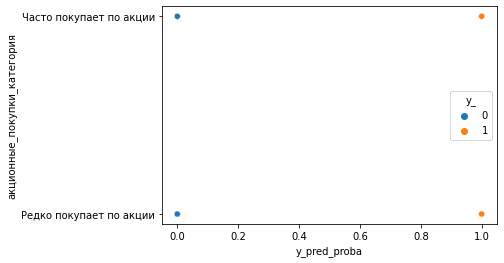

In [139]:
sns.scatterplot(data=test_df, x='y_pred_proba', y='акционные_покупки_категория', hue='y_')
plt.show()

In [140]:
low = test_df[test_df['y_'] == 0]
same = test_df[test_df['y_'] == 1]

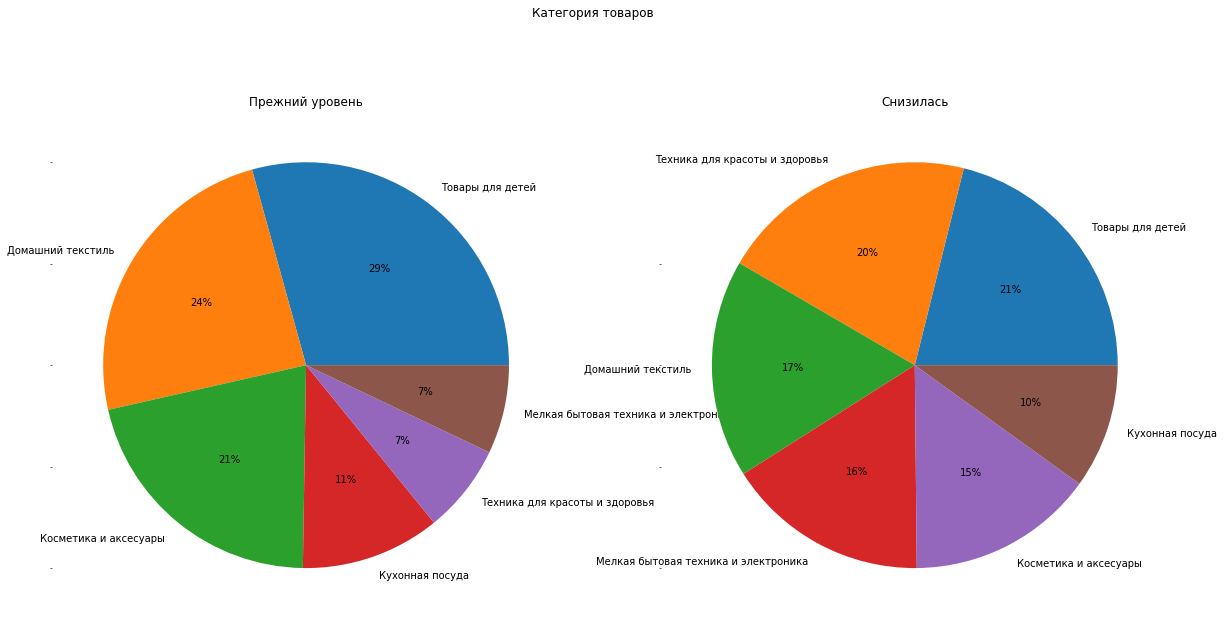

In [85]:
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(20,10));
fig.suptitle('Категория товаров',y=1);
same['популярная_категория'].value_counts().plot(kind='pie',y='популярная_категория',ax=ax0,autopct='%1.0f%%',legend=None);
low['популярная_категория'].value_counts().plot(kind='pie',y='популярная_категория',ax=ax1,autopct='%1.0f%%',legend=None);
ax0.set(title='Прежний уровень',ylabel='');
ax1.set(title='Снизилась');

**Промежуточный вывод**
Покупательская активность снижается у тех людей, кто пришел за акционными товарами. Они меньше времени проводят на сайте, у них выше доля неоплаченных товаров.

В качестве рекомендаций, можно выделить следующие пункты:

предлагать таким клиентам товары из других категорий
предлагать рассылать информацию текущих скидках и товарах
предлагать какие-то бонусы и привилегии в рамках типа сервиса
повышать маркетинговую активность как важный показатель, коррелирующий с целевой переменной

## Шаг 9. Общий вывод

В процессе исследования было выполнено:

#  1. Загрузка данных

Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы. 

Видно что в дате содержаться некоторые грамматические ошибки в данных, а также форматы названия колонок не идентичны и их нужно привести к одинаковому формату.

Значение Данных:

**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.


#  2. Подготовка данных

- Все столбцы в таблицах имеют типы данных, соответствующие их описанию.
id во всех таблицах - целочисленный тип данных.
В таблице market_file столбцы Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Ошибка_сервиса, Страниц_за_визит - вещественный тип данных.
В таблицах market_money и money столбцы Выручка и Прибыль - вещественный тип данных.
Во всех таблицах остальные столбцы - текстовый тип данных.
- Дублей нет;
- Названия фич уже приведены в порядок на этапе загрузки данных;
- В нкеоторых столбцах название категорий cкорректированы:
- Пропусков нет.


#  3. Исследовательский анализ данных

Количество строк в таблицах:
- market_file - 1300 строк
- market_money - 3900 строк
- market_time - 2600 строк
- money - 1300 строк

**market_file**

- Числовые столбцы:

В среднем компания коммуницирует с клиентом за 6 месяцев 4 раза. Минимальное значение около 1 и максимальным 6. 
Число ошибок на сайте около 6
Среднее количество страниц на сайте за последние 3 месяца - 7, иаксимально 20 и минимальное 1. 
Общее кол-во неоплаченных товаров в корзине в среднем 3, минимально 0 и максимальное 10
Длительность среднего использования на платформе составляет примерно 600 дней, с минимальным значением 110 дней и максимальным значением 1079 дней.
Среднее количество акционных покупок составляет около 0.32, с минимальным значением 0 и максимальным значением 0.99.

- Категориальные столбцы:

Большинство пользователей имеют прежний уровень покупательской активности, однако у части пользователей наблюдается снижение активности.
Большинство пользователей пользуются стандартным типом сервиса, в то время как премиум-сервисом пользуются 29%.
Большинство пользователей разрешают отправку уведомлений, но также есть и те, кто отказывается.
Среди популярных категорий товаров на платформе наиболее популярными являются "Товары для детей", "Домашний текстиль" и "Косметика и аксессуары".

**market_time**

- Числовые столбцы:
Среднее время, проведенное на сайте, составляет около 13 минут, при этом минимальное значение 4 и максимальное 23. В целом, данные имеют нормальное распределение.

**market_money**

- Числовые столбцы:
В целом, данные имеют нормальное распределение, за исключением столбца "выручка", где был обнаружен выброс. Выброс был удален, что сделало распределения более однородными. Средняя выручка 5 007, минимальное значение 2758.7 и максимальное значение 7799.

**money**

- Числовые столбцы:
В целом, данные имеют нормальное распределение. Средняя прибыль составляет около 4.00, минимальное значение 0,86 и максимальное 7,43.

#  4. Объединение таблиц


Выполнено объединение трех таблиц: market_file, market_money и market_time. Для этого были использованы методы pivot_table и merge библиотеки pandas.

Сначала были созданы сводные таблицы для market_money и market_time, где каждый период был преобразован в отдельный столбец. Это позволило нам иметь отдельные столбцы для выручки и времени на сайте для каждого периода.

Затем эти сводные таблицы были объединены с основной таблицей market_file по столбцу 'id'. Результатом является итоговая таблица market_fin, которая содержит все необходимые данные в удобном для анализа формате.


#  5. Корреляционный анализ

Корреляционный анализ позволяет оценить взаимосвязи между различными признаками в нашем наборе данных. 

Мультиколлинеарность, которая обозначает высокую корреляцию между двумя или более входными признаками, может привести к проблемам в моделировании, так как она затрудняет определение влияния отдельных признаков на целевую переменную. Однако, в нашем случае, мультиколлинеарность не является проблемой, так как коэффициенты корреляции между признаками не достигают критического уровня (обычно 0.9 или выше).


#  6. Использование пайплайнов

**6.1** Подготовка данных

Преобразуем категориальный признак ‘покупательская_активность’ в числовой, чтобы модель машинного обучения могла работать с этим признаком Если активность покупателя ‘Снизилась’, то она преобразуется в 1, в противном случае - в 0.

Создадим новый категориальный признак ‘акционные_покупки_категория’ на основе числового признака ‘акционные_покупки’. Если значение ‘акционные_покупки’ больше или равно 0.5, то новый признак получает значение ‘Часто покупает по акции’, в противном случае - ‘Редко покупает по акции’. Это может помочь модели лучше понять взаимосвязи в данных.

**6.2** Обучение четырех моделей 

В этом шаге мы использовали ColumnTransformer для обработки категориальных и количественных признаков раздельно. Мы кодировали категориальные признаки с помощью OneHotEncoder и OrdinalEncoder, а количественные признаки масштабировали с помощью StandardScaler и MinMaxScaler.

**6.3** Выбрали лучшую модель используя заданную метрику
Выбор модели: Было проведено сравнение нескольких моделей машинного обучения, включая Decision Tree, K-Nearest Neighbors, Logistic Regression и Support Vector Classifier. Использовался процесс подбора оптимальных гиперпараметров для каждой модели с помощью GridSearchCV.

Лучшая модель: Наилучшей моделью, оцененной с помощью метрики ROC-AUC на тренировочной выборке, оказалась Support Vector Classifier. Это означает, что Support Vector Classifier имеет наилучшую способность разделять классы на тренировочных данных, что является важным показателем для эффективной классификации клиентов по их покупательской активности.

Оценка производительности: Выбранная модель была оценена на тестовой выборке с использованием метрик ROC-AUC и F1-score. ROC-AUC показало значение 0.91, что свидетельствует о хорошем качестве модели в разделении классов.

Анализ ошибок модели: Была проведена аналитика ошибок модели, включая построение матрицы ошибок и отчета о классификации на тестовой выборке. Это позволяет лучше понять, в каких случаях модель ошибается и какие классы она предсказывает наиболее точно.

Precision-Recall кривая: Была построена кривая precision-recall, которая позволяет оценить производительность модели при различных порогах вероятности классификации. 

Таким образом, на основании проведенного анализа можно утверждать, что SVC является наилучшей моделью для классификации клиентов по их покупательской активности в данном наборе данных.


#  7. Анализ важности признаков

Выводы о значимости признаков:

Малозначимые признаки: Некоторые признаки, такие как популярная_категория, выручка_текущий_месяц, ошибка_сервиса имеют очень низкую важность (SHAP значения близки к нулю). Это означает, что эти признаки мало влияют на прогнозы модели.

Наиболее важные признаки: Признаки, такие как 'num__страниц_за_визит', 'num__средний_просмотр_категорий_за_визит', 'num__предыдущий_месяц', 'ohe__популярная_категория_Мелкая бытовая техника и электроника' и 'num__неоплаченные_продукты_штук_квартал', имеют наибольшую важность. Это означает, что они сильно влияют на прогнозы модели.

Использование этих наблюдений при моделировании и принятии бизнес-решений:

Улучшение модели: Можно улучшить производительность модели, сосредоточившись на наиболее важных признаках. Например, можно провести более тщательный анализ этих признаков, оптимизировать их преобразование и масштабирование или создать новые признаки на основе них.

Принятие бизнес-решений: Важность признаков может помочь в принятии бизнес-решений, указывая на области, которые имеют наибольшее влияние на целевой признак. Например, если 'num__средний_просмотр_категорий_за_визит' является важным признаком, то увеличение числа просмотров категорий за визит может улучшить целевой показатель. Это может быть достигнуто путем улучшения пользовательского интерфейса, оптимизации навигации по сайту или проведения маркетинговых кампаний, направленных на увеличение вовлеченности пользователей.

# 8. Сегментация покупателей

Покупательская активность снижается у тех людей, кто пришел за акционными товарами. Они меньше времени проводят на сайте, у них выше доля неоплаченных товаров.

В качестве рекомендаций, можно выделить следующие пункты:

предлагать таким клиентам товары из других категорий
предлагать рассылать информацию текущих скидках и товарах
предлагать какие-то бонусы и привилегии в рамках типа сервиса
повышать маркетинговую активность как важный показатель, коррелирующий с целевой переменной